In [1]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
import inferpy as inf
import tensorflow_probability as tfp

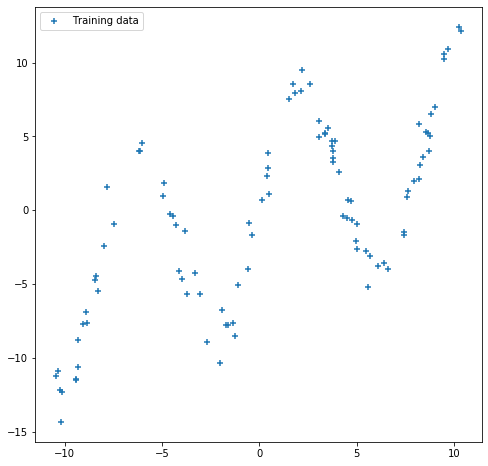

In [2]:
NSAMPLE = 100
x_train = np.float32(np.random.uniform(-10.5, 10.5, (1, NSAMPLE))).T
r_train = np.float32(np.random.normal(size=(NSAMPLE,1),scale=1.0))
y_train = np.float32(np.sin(0.75*x_train)*7.0+x_train*0.5+r_train*1.0)

plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.legend();

In [3]:
# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [4]:
NHIDDEN = 20

nnetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(NHIDDEN, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1)
])

lossfunc = lambda y_out, y: tf.nn.l2_loss(y_out-y)

nnetwork.compile(tf.train.AdamOptimizer(0.01), lossfunc)
nnetwork.fit(x=x_train, y=y_train, epochs=300)

Train on 100 samples
Epoch 1/300
100/100 [==============================] - 0s 2ms/sample - loss: 683.4653
Epoch 2/300
100/100 [==============================] - 0s 137us/sample - loss: 545.5008
Epoch 3/300
100/100 [==============================] - 0s 120us/sample - loss: 445.2032
Epoch 4/300
100/100 [==============================] - 0s 153us/sample - loss: 398.6327
Epoch 5/300
100/100 [==============================] - 0s 125us/sample - loss: 370.6442
Epoch 6/300
100/100 [==============================] - 0s 130us/sample - loss: 345.1064
Epoch 7/300
100/100 [==============================] - 0s 164us/sample - loss: 341.6495
Epoch 8/300
100/100 [==============================] - 0s 235us/sample - loss: 334.5673
Epoch 9/300
100/100 [==============================] - 0s 127us/sample - loss: 345.2308
Epoch 10/300
100/100 [==============================] - 0s 235us/sample - loss: 346.0534
Epoch 11/300
100/100 [==============================] - 0s 82us/sample - loss: 348.0993
Epoch 12/300

100/100 [==============================] - 0s 128us/sample - loss: 276.2898
Epoch 93/300
100/100 [==============================] - 0s 151us/sample - loss: 278.8842
Epoch 94/300
100/100 [==============================] - 0s 133us/sample - loss: 259.9797
Epoch 95/300
100/100 [==============================] - 0s 173us/sample - loss: 272.5512
Epoch 96/300
100/100 [==============================] - 0s 124us/sample - loss: 267.9102
Epoch 97/300
100/100 [==============================] - 0s 130us/sample - loss: 277.6940
Epoch 98/300
100/100 [==============================] - 0s 146us/sample - loss: 265.5384
Epoch 99/300
100/100 [==============================] - 0s 146us/sample - loss: 269.6732
Epoch 100/300
100/100 [==============================] - 0s 166us/sample - loss: 260.1160
Epoch 101/300
100/100 [==============================] - 0s 138us/sample - loss: 270.9526
Epoch 102/300
100/100 [==============================] - 0s 144us/sample - loss: 276.2874
Epoch 103/300
100/100 [========

100/100 [==============================] - 0s 106us/sample - loss: 205.9663
Epoch 184/300
100/100 [==============================] - 0s 233us/sample - loss: 205.5579
Epoch 185/300
100/100 [==============================] - 0s 206us/sample - loss: 207.6037
Epoch 186/300
100/100 [==============================] - 0s 303us/sample - loss: 209.2958
Epoch 187/300
100/100 [==============================] - 0s 200us/sample - loss: 210.5713
Epoch 188/300
100/100 [==============================] - 0s 367us/sample - loss: 185.2684
Epoch 189/300
100/100 [==============================] - 0s 168us/sample - loss: 199.6886
Epoch 190/300
100/100 [==============================] - 0s 133us/sample - loss: 189.5038
Epoch 191/300
100/100 [==============================] - 0s 197us/sample - loss: 197.7648
Epoch 192/300
100/100 [==============================] - 0s 126us/sample - loss: 197.3256
Epoch 193/300
100/100 [==============================] - 0s 174us/sample - loss: 195.7302
Epoch 194/300
100/100 [=

Epoch 274/300
100/100 [==============================] - 0s 195us/sample - loss: 131.8829
Epoch 275/300
100/100 [==============================] - 0s 246us/sample - loss: 129.6655
Epoch 276/300
100/100 [==============================] - 0s 137us/sample - loss: 125.8220
Epoch 277/300
100/100 [==============================] - 0s 171us/sample - loss: 125.1092
Epoch 278/300
100/100 [==============================] - 0s 166us/sample - loss: 127.0090
Epoch 279/300
100/100 [==============================] - 0s 185us/sample - loss: 122.0954
Epoch 280/300
100/100 [==============================] - 0s 177us/sample - loss: 124.7957
Epoch 281/300
100/100 [==============================] - 0s 246us/sample - loss: 127.8030
Epoch 282/300
100/100 [==============================] - 0s 193us/sample - loss: 120.7116
Epoch 283/300
100/100 [==============================] - 0s 171us/sample - loss: 125.1003
Epoch 284/300
100/100 [==============================] - 0s 243us/sample - loss: 125.7620
Epoch 285/

In [5]:
# univariate lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [6]:
len_train = len(x_train)
n_steps = 10

x_train_seq, y_train_seq = split_sequence(x_train, n_steps)
for i in range(len(X)):
    print(x_train_seq[i], y_train_seq[i])

[[10.38922   ]
 [ 8.787075  ]
 [ 3.803226  ]
 [ 3.5210872 ]
 [ 0.14670794]
 [ 2.1197848 ]
 [ 9.691044  ]
 [ 7.5956798 ]
 [-0.50598425]
 [ 4.74269   ]] [8.702118]
[[ 8.787075  ]
 [ 3.803226  ]
 [ 3.5210872 ]
 [ 0.14670794]
 [ 2.1197848 ]
 [ 9.691044  ]
 [ 7.5956798 ]
 [-0.50598425]
 [ 4.74269   ]
 [ 8.702118  ]] [3.7649207]
[[ 3.803226  ]
 [ 3.5210872 ]
 [ 0.14670794]
 [ 2.1197848 ]
 [ 9.691044  ]
 [ 7.5956798 ]
 [-0.50598425]
 [ 4.74269   ]
 [ 8.702118  ]
 [ 3.7649207 ]] [4.5142045]
[[ 3.5210872 ]
 [ 0.14670794]
 [ 2.1197848 ]
 [ 9.691044  ]
 [ 7.5956798 ]
 [-0.50598425]
 [ 4.74269   ]
 [ 8.702118  ]
 [ 3.7649207 ]
 [ 4.5142045 ]] [8.219972]
[[ 0.14670794]
 [ 2.1197848 ]
 [ 9.691044  ]
 [ 7.5956798 ]
 [-0.50598425]
 [ 4.74269   ]
 [ 8.702118  ]
 [ 3.7649207 ]
 [ 4.5142045 ]
 [ 8.219972  ]] [9.01195]
[[ 2.1197848 ]
 [ 9.691044  ]
 [ 7.5956798 ]
 [-0.50598425]
 [ 4.74269   ]
 [ 8.702118  ]
 [ 3.7649207 ]
 [ 4.5142045 ]
 [ 8.219972  ]
 [ 9.01195   ]] [3.0701618]


In [7]:
x_train_seq.shape[0]

90

In [8]:
NHIDDEN = 20
n_features = 1

x_train_seq_reshape = x_train_seq.reshape(x_train_seq.shape[0], x_train_seq.shape[1], n_features)

# define model
model = Sequential()
model.add(LSTM(NHIDDEN, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))


model.compile(tf.train.AdamOptimizer(0.01), lossfunc)
model.fit(x=x_train_seq_reshape, y=y_train_seq, epochs=250)

Train on 90 samples
Epoch 1/250
90/90 [==============================] - 1s 11ms/sample - loss: 609.6770
Epoch 2/250
90/90 [==============================] - 0s 760us/sample - loss: 594.5097
Epoch 3/250
90/90 [==============================] - 0s 648us/sample - loss: 599.2062
Epoch 4/250
90/90 [==============================] - 0s 779us/sample - loss: 592.8460
Epoch 5/250
90/90 [==============================] - 0s 619us/sample - loss: 580.0996
Epoch 6/250
90/90 [==============================] - 0s 785us/sample - loss: 583.1490
Epoch 7/250
90/90 [==============================] - 0s 897us/sample - loss: 573.4074
Epoch 8/250
90/90 [==============================] - 0s 1ms/sample - loss: 566.8341
Epoch 9/250
90/90 [==============================] - 0s 983us/sample - loss: 564.5384
Epoch 10/250
90/90 [==============================] - 0s 758us/sample - loss: 547.5707
Epoch 11/250
90/90 [==============================] - 0s 897us/sample - loss: 528.1917
Epoch 12/250
90/90 [===============

90/90 [==============================] - 0s 716us/sample - loss: 0.8382
Epoch 97/250
90/90 [==============================] - 0s 654us/sample - loss: 0.6087
Epoch 98/250
90/90 [==============================] - 0s 900us/sample - loss: 0.5639
Epoch 99/250
90/90 [==============================] - 0s 922us/sample - loss: 0.4729
Epoch 100/250
90/90 [==============================] - 0s 813us/sample - loss: 0.5648
Epoch 101/250
90/90 [==============================] - 0s 777us/sample - loss: 0.4530
Epoch 102/250
90/90 [==============================] - 0s 643us/sample - loss: 0.3844
Epoch 103/250
90/90 [==============================] - 0s 605us/sample - loss: 0.4119
Epoch 104/250
90/90 [==============================] - 0s 624us/sample - loss: 0.2405
Epoch 105/250
90/90 [==============================] - 0s 604us/sample - loss: 0.2482
Epoch 106/250
90/90 [==============================] - 0s 1ms/sample - loss: 0.3128
Epoch 107/250
90/90 [==============================] - 0s 833us/sample - 

90/90 [==============================] - 0s 709us/sample - loss: 0.4534
Epoch 192/250
90/90 [==============================] - 0s 556us/sample - loss: 0.3025
Epoch 193/250
90/90 [==============================] - 0s 667us/sample - loss: 0.1939
Epoch 194/250
90/90 [==============================] - 0s 663us/sample - loss: 0.1229
Epoch 195/250
90/90 [==============================] - 0s 756us/sample - loss: 0.1750
Epoch 196/250
90/90 [==============================] - 0s 623us/sample - loss: 0.1408
Epoch 197/250
90/90 [==============================] - 0s 527us/sample - loss: 0.0901
Epoch 198/250
90/90 [==============================] - 0s 646us/sample - loss: 0.0890
Epoch 199/250
90/90 [==============================] - 0s 668us/sample - loss: 0.0528
Epoch 200/250
90/90 [==============================] - 0s 1ms/sample - loss: 0.0416
Epoch 201/250
90/90 [==============================] - 0s 1ms/sample - loss: 0.0379
Epoch 202/250
90/90 [==============================] - 0s 1ms/sample - l

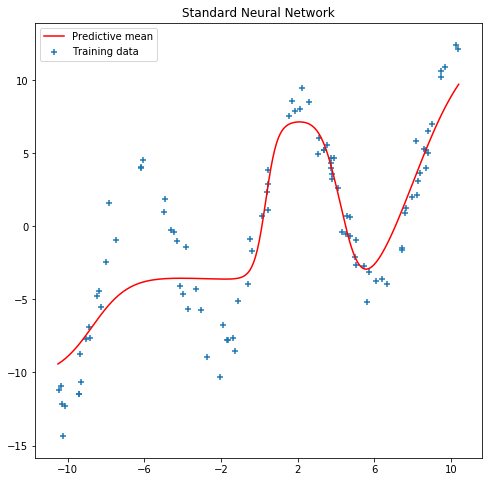

In [9]:
sess = tf.keras.backend.get_session()
x_test = np.float32(np.arange(-10.5,10.5,0.1))
x_test = x_test.reshape(x_test.size,1)
y_test = sess.run(nnetwork(x_test))

plt.figure(figsize=(8, 8))
plt.plot(x_test, y_test, 'r-', label='Predictive mean');
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.xticks(np.arange(-10., 10.5, 4))
plt.title('Standard Neural Network')
plt.legend();

(200,)
(200,)


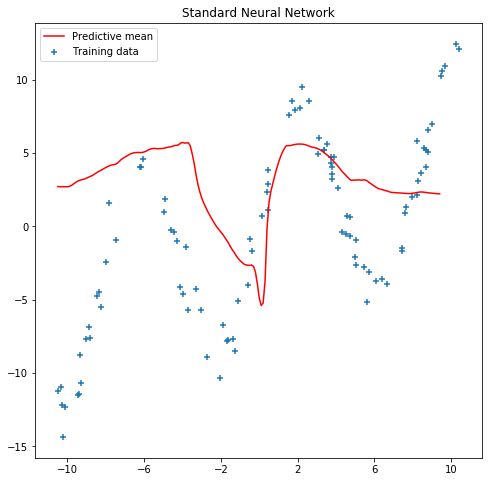

In [10]:
sess = tf.keras.backend.get_session()
x_test = np.float32(np.arange(-10.5,10.5,0.1))
x_test_seq, y_test_seq = split_sequence(x_test, n_steps)
# print(x_test.shape)
y_test_list = []
for i in range(x_test.size-n_steps):
    x_test_element = x_test_seq[i].reshape((1, n_steps, n_features))
    y_test_seq = model.predict(x_test_element, verbose=0)
#     print(y_test_seq)
    y_test_seq = y_test_seq.flatten()
    y_test_list.append(y_test_seq[0].flatten())

y_test_disp = np.array(y_test_list)
print(x_test[:-n_steps].shape)
print(y_test_disp.reshape(-1).shape)

plt.figure(figsize=(8, 8))
plt.plot(x_test[:-n_steps], y_test_disp, 'r-', label='Predictive mean');
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.xticks(np.arange(-10., 10.5, 4))
plt.title('Standard Neural Network')
plt.legend();

In [11]:
@inf.probmodel
def model(NHIDDEN):

    with inf.datamodel():
        x = inf.Normal(loc = tf.zeros([1]), scale = 1.0, name="x")

        nnetwork = inf.layers.Sequential([
            tfp.layers.DenseFlipout(NHIDDEN, activation=tf.nn.tanh),
            tfp.layers.DenseFlipout(1)
        ])

        y = inf.Normal(loc = nnetwork(x) , scale= 1., name="y")

In [12]:
def neural_network(X, NHIDDEN):
    
    net = LSTM(NHIDDEN, activation = 'relu', input_shape = (n_steps, n_features))(X)
    loc = Dense(1, activation=None)(net)
    
    return loc

In [13]:
@inf.probmodel
def LSTMBayesmodel(NHIDDEN, n_features, n_steps):

    with inf.datamodel():
        x = inf.Normal(loc = tf.zeros([n_steps, n_features]), scale = 1.0, name="x")
#         print(x.eval())
#         x = x.eval().reshape(n_steps, n_features)
        print(x.shape)
        y = inf.Normal(loc = neural_network(x, NHIDDEN) , scale= 1., name="y")

In [14]:
@inf.probmodel
def qmodel():
    pass

In [15]:
NHIDDEN=20

p = model(NHIDDEN)
q = qmodel()

VI = inf.inference.VI(q, optimizer = tf.train.AdamOptimizer(0.01), epochs=5000)

p.fit({"x": x_train, "y": y_train}, VI)


 0 epochs	 4080.8740234375....................
 200 epochs	 3112.427734375....................
 400 epochs	 2542.830078125....................
 600 epochs	 2240.407958984375....................
 800 epochs	 2217.149658203125....................
 1000 epochs	 2208.216064453125....................
 1200 epochs	 2205.736328125....................
 1400 epochs	 2203.815185546875....................
 1600 epochs	 2204.262451171875....................
 1800 epochs	 2203.1484375....................
 2000 epochs	 2203.21044921875....................
 2200 epochs	 2202.2548828125....................
 2400 epochs	 2201.007568359375....................
 2600 epochs	 2200.20166015625....................
 2800 epochs	 2199.11279296875....................
 3000 epochs	 2199.088623046875....................
 3200 epochs	 2198.47802734375....................
 3400 epochs	 2198.365478515625....................
 3600 epochs	 2197.444091796875....................
 3800 epochs	 2195.81787109375..........

In [16]:
NHIDDEN=20

p1 = LSTMBayesmodel(NHIDDEN, n_features, n_steps)
q1 = qmodel()

VI = inf.inference.VI(q1, optimizer = tf.train.AdamOptimizer(0.01), epochs=2000)

p1.fit({"x": x_train_seq_reshape, "y": y_train_seq}, VI)

(1, 10, 1)
(1, 10, 1)
(90, 10, 1)

 0 epochs	 20127.85546875....................
 200 epochs	 18364.078125....................
 400 epochs	 18362.99609375....................
 600 epochs	 18362.99609375....................
 800 epochs	 18362.99609375....................
 1000 epochs	 18388.548828125....................
 1200 epochs	 18363.03515625....................
 1400 epochs	 18363.037109375....................
 1600 epochs	 18362.99609375....................
 1800 epochs	 18362.99609375....................

(90, 10, 1)


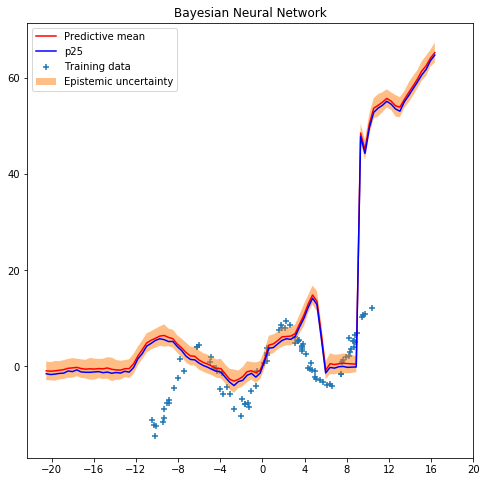

In [17]:
x_test = np.linspace(-20.5, 20.5, NSAMPLE).reshape(-1, 1)

x_test_seq, y_test_seq = split_sequence(x_test, n_steps)

print(x_test_seq.shape)

plt.figure(figsize=(8, 8))

y_pred_list = []
for i in range(100):
    y_test = p1.posterior_predictive(["y"], data = {"x": x_test_seq}).sample()
    y_pred_list.append(y_test)

y_preds = np.concatenate(y_pred_list, axis=1)
y_p25 = np.percentile(y_preds, 25, axis=1)
y_mean = np.mean(y_preds, axis=1)
y_sigma = np.std(y_preds, axis=1)

plt.plot(x_test[0:NSAMPLE-n_steps], y_mean, 'r-', label='Predictive mean');
plt.plot(x_test[0:NSAMPLE-n_steps], y_p25, 'b-', label='p25');
plt.scatter(x_train[0:NSAMPLE-n_steps], y_train[0:NSAMPLE-n_steps], marker='+', label='Training data')
plt.fill_between(x_test[0:NSAMPLE-n_steps].ravel(),
                 y_mean + 2 * y_sigma,
                 y_mean - 2 * y_sigma,
                 alpha=0.5, label='Epistemic uncertainty')
plt.xticks(np.arange(-20., 20.5, 4))
plt.title('Bayesian Neural Network')
plt.legend();

In [18]:
p.posterior_predictive(["y"], data = {"x": x_test}).parameters()

{'loc': array([[-0.13302396],
        [-0.38852477],
        [-0.38180566],
        [-0.51085395],
        [-0.10444234],
        [ 0.20270693],
        [ 0.02203782],
        [ 0.11328639],
        [ 0.16490553],
        [ 0.34919077],
        [-0.19323678],
        [ 0.22111128],
        [-0.06316199],
        [-0.30119413],
        [ 0.04654375],
        [ 0.0084938 ],
        [ 0.06093099],
        [ 0.0696152 ],
        [-0.08469628],
        [ 0.06318982],
        [-0.1709706 ],
        [ 0.21623407],
        [ 0.07760486],
        [-0.07556973],
        [-0.14325078],
        [ 0.13737732],
        [-0.03318732],
        [-0.18335338],
        [-0.43003446],
        [ 0.16759476],
        [-0.07928722],
        [ 0.32124835],
        [ 0.13270196],
        [ 0.03281633],
        [-0.1648782 ],
        [ 0.044316  ],
        [-0.06682073],
        [ 0.23678635],
        [ 0.00884188],
        [-0.11807813],
        [ 0.08994345],
        [ 0.01135602],
        [ 0.12811604],
    